Inspired in [Roberto Pontes blog Neuroinvest](http://neuroinvest.blogspot.com.br/)

**REQUIREMENTS**
`$ pip install yahoo-finance` 

**TODO**
- Ajustments in all indicators with warnings
- More stocks
- Ajust Donchian Channel function
- Include some Trend Following inside the model like [this guys](http://www.trendfollowingbovespa.com.br/) 
- See if [this blog](http://investcharts.blogspot.com.br/) have something useful
- Get the [Neuroinvest benchmark](https://www.mql5.com/pt/signals/229387) 
- Put the [description of the indicators](https://en.wikipedia.org/wiki/Technical_analysis)
- Think about [LTSM](http://danielhnyk.cz/predicting-sequences-vectors-keras-using-rnn-lstm/)
- Instructions of BUY/HOLD/SELL like [this guy](https://ntguardian.wordpress.com/2016/09/26/introduction-stock-market-data-python-2/)
- To Read: [A hybrid stock trading framework integrating technical analysis with machine learning techniques](http://www.sciencedirect.com/science/article/pii/S2405918815300179)
- Beat this paper: [Stock Trend Prediction with Technical Indicators using SVM](http://cs229.stanford.edu/proj2014/Xinjie%20Di,%20Stock%20Trend%20Prediction%20with%20Technical%20Indicators%20using%20SVM.pdf)
- To Read: [Nonlinear support vector machines can systematically identify stocks with high and low future returns](http://algorithmicfinance.org/2-1/pp45-58/)
- To Read (In sometime in the future): [VARMA versus VAR for
Macroeconomic Forecasting](http://users.monash.edu.au/~gathana/slides/isf07.pdf)
- To Read (Strategies):[Machine Learning in Stock Price Trend Forecasting](http://cs229.stanford.edu/proj2013/DaiZhang-MachineLearningInStockPriceTrendForecasting.pdf)
- Do a I need some NLP in my Models? (Evaluate this post): [Deep Learning the Stock Market](https://medium.com/@TalPerry/deep-learning-the-stock-market-df853d139e02) 
- To Read (Get references): [A Machine Learning Approach for Stock Price Prediction](https://pdfs.semanticscholar.org/7ebd/dbd758e9b4a1466e48416d046478452bf6a3.pdf)
- I need to do this course: [Aprendizado de Máquina para Negociação
](https://br.udacity.com/course/machine-learning-for-trading--ud501/)
- To Read (Oldie but gold): [Machine Learning Techniques for Stock Prediction ](http://www.vatsals.com/essays/machinelearningtechniquesforstockprediction.pdf)
- Another repo about Machine Learning and Stock Prediction: [Stock Price Prediction using Machine Learning Techniques](https://github.com/scorpionhiccup/StockPricePrediction)

**REFERENCES** 
- [Yahoo Finance Package](https://github.com/lukaszbanasiak/yahoo-finance)
- [Pandas Talib](https://github.com/femtotrader/pandas_talib/blob/master/pandas_talib/__init__.py)
- [bpsmith - Tech Indicators](https://github.com/bpsmith/tia/blob/master/tia/analysis/ta.py)
- [Talib Extention](https://github.com/tomyitav/talib-extensions/blob/master/TechnicalAnalysis/src/indicators/TalibExtension.py)




In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib import style
from yahoo_finance import Share
from pprint import pprint
from datetime import datetime, timedelta
from datetime import date
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.wrappers.scikit_learn import KerasRegressor

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.


In [3]:
style.use('fivethirtyeight')

In [4]:
# 5 years rolling to date
days_to_subtract = 133

today_is = datetime.today()

five_years_to_date_is = datetime.today() - timedelta(days=days_to_subtract)

print ("Today is: ") + str(today_is.date()) + (" and 5 Years to Date is: ") + str(five_years_to_date_is.date())

Today is: 2017-05-14 and 5 Years to Date is: 2017-01-01


In [5]:
wege = Share('WEGE3.SA')

In [6]:
hoje = str(today_is.year) + "/" + str(today_is.month) + "/" + str(today_is.day) 
cinco_anos = str(five_years_to_date_is.year) + "/" + str(five_years_to_date_is.month) + "/" + str(five_years_to_date_is.day) 

hoje = date(*map(int, hoje.split('/')))
cinco_anos = date(*map(int, cinco_anos.split('/')))

hoje = str(hoje)
cinco_anos = str(cinco_anos)

In [7]:
df_wege = wege.get_historical(cinco_anos, hoje)

In [8]:
df_wege = json.dumps(df_wege)

In [9]:
df_wege = pd.read_json(df_wege)

In [10]:
df_wege = df_wege.sort_values(['Date'], ascending=[1])

In [11]:
n = 15

In [12]:
def MA(df, n):
    """
    Moving Average
    """
    result = df['Close'].rolling(window=n,center=False).mean()
    return (result)

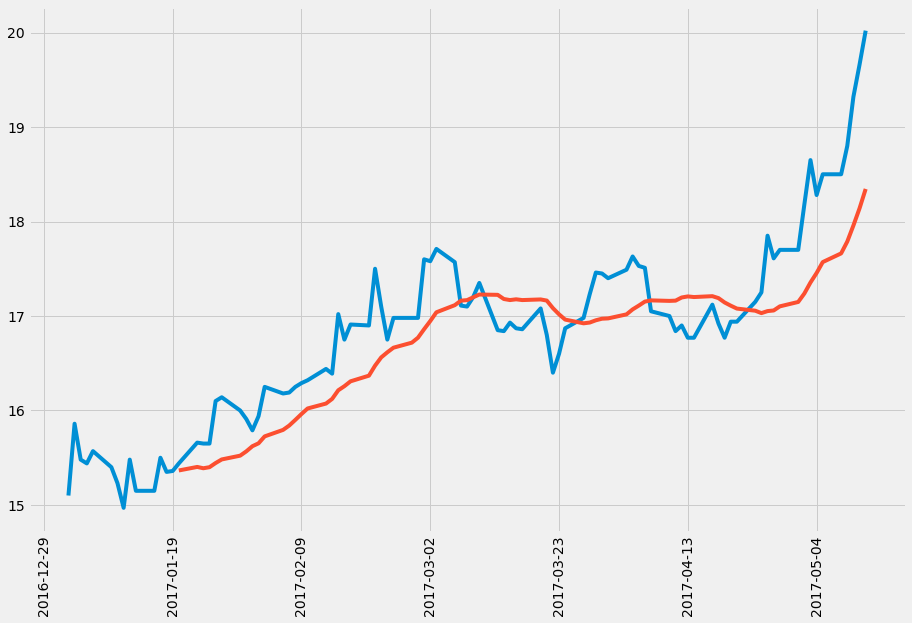

In [13]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, df_wege['Close']
         ,df_wege.Date, MA(df_wege, n)
        )

In [14]:
def BBANDS(df, n):
    """
    Bollinger Bands
    """
    MA = df['Close'].rolling(window=n,center=False).mean()
    MSD = df['Close'].rolling(window=n,center=False).std()
    
    UpperBollinger = MA + (MSD * 2)
    LowerBollinger = MA - (MSD * 2)

    B1 = pd.Series(UpperBollinger, name='UpperBollinger_' + str(n))
    B2 = pd.Series(LowerBollinger, name='LowerBollinger_' + str(n))
    
    result = pd.DataFrame([B1, B2]).transpose()
    return (result)

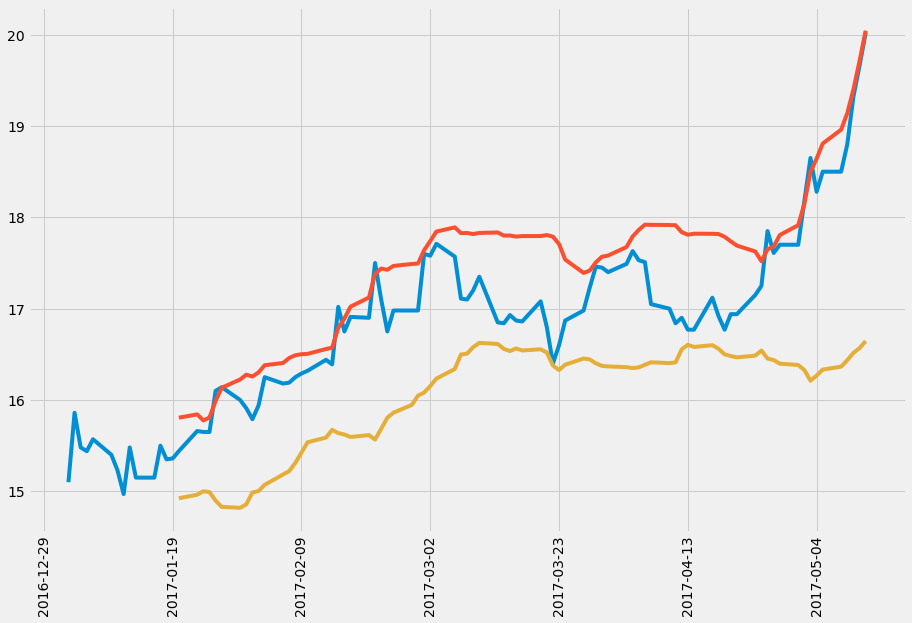

In [15]:
plt.xticks(rotation=90)
plt.plot(df_wege.Date, df_wege['Close']
         ,df_wege.Date, BBANDS(df_wege, n).UpperBollinger_15
         ,df_wege.Date, BBANDS(df_wege, n).LowerBollinger_15
        )

In [16]:
def STOK(df):
    """
    Stochastic oscillator %K
    """
    result = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    return (result)

In [17]:
def STO(df, n):
    """
    Stochastic oscillator %D
    """
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name='SO%k')
    result = pd.Series(pd.ewma(SOk, span=n, min_periods=n - 1), name='SO%d_' + str(n))
    return (result)


In [18]:
def SMA(df, n):
    """
    Smoothed Moving Average
    """
    result = pd.rolling_mean(df['Close'], n, min_periods=n)
    return (result)


In [19]:
def EMA(df, n):
    """
    Exponential Moving Average
    """
    result=pd.Series(pd.ewma(df['Close'], span=n, min_periods=n - 1), name='EMA_' + str(n))
    #Series.ewm(ignore_na=False,span=15,min_periods=14,adjust=True).mean()
    return (result)


In [20]:
def MOM(df, n):
    """
    Momentum
    """
    result=pd.Series(df['Close'].diff(n), name='Momentum_' + str(n))
    return (result)



In [21]:
def ROC(df, n):
    """
    Rate of Change
    """
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    result = pd.Series(M / N, name='ROC_' + str(n))
    return (result)

In [22]:
def STDDEV(df, n):
    """
    Standard Deviation
    """
    result = pd.Series(pd.rolling_std(df['Close'], n), name='STD_' + str(n))
    return (result)

In [23]:
def KELCH(df, n):
    """
    Keltner Channel
    """
    KelChM = pd.Series(pd.rolling_mean((df['High'] + df['Low'] + df['Close']) / 3, n), name='KelChM_' + str(n))
    KelChU = pd.Series(pd.rolling_mean((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3, n), name='KelChU_' + str(n))
    KelChD = pd.Series(pd.rolling_mean((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3, n), name='KelChD_' + str(n))
    result = pd.DataFrame([KelChM, KelChU, KelChD]).transpose()
    return (result)

In [24]:
def CCI(df, n):
    """
    Commodity Channel Index
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    result = pd.Series((PP - pd.rolling_mean(PP, n)) / pd.rolling_std(PP, n), name='CCI_' + str(n))
    return (result)

In [25]:
def EOM(df, n):
    """
    Ease of Movement
    """
    EoM = (df['High'].diff(1) + df['Low'].diff(1)) * (df['High'] - df['Low']) / (2 * df['Volume'])
    result = pd.Series(pd.rolling_mean(EoM, n), name='EoM_' + str(n))
    return (result)

In [26]:
def FORCE(df, n):
    """
    Force Index
    """
    result = pd.Series(df['Close'].diff(n) * df['Volume'].diff(n), name='Force_' + str(n))
    return (result)

In [27]:
def Chaikin(df):
    """
    Chaikin Oscillator
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    result = pd.Series(pd.ewma(ad, span=3, min_periods=2) - pd.ewma(ad, span=10, min_periods=9), name='Chaikin')
    return (result)

In [28]:
def ACCDIST(df, n):
    """
    Accumulation/Distribution
    """
    ad = (2 * df['Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    result = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    return (result)

In [29]:
def TSI(df, r, s):
    """
    True Strength Index
    r = EMA smoothing period for momentum, typically 25
    s = EMA smoothing period for smoothed momentum, typically 13
    """
    M = pd.Series(df['Close'].diff(1))
    aM = abs(M)
    EMA1 = pd.Series(pd.ewma(M, span=r, min_periods=r - 1))
    aEMA1 = pd.Series(pd.ewma(aM, span=r, min_periods=r - 1))
    EMA2 = pd.Series(pd.ewma(EMA1, span=s, min_periods=s - 1))
    aEMA2 = pd.Series(pd.ewma(aEMA1, span=s, min_periods=s - 1))
    result = pd.Series(EMA2 / aEMA2, name='TSI_' + str(r) + '_' + str(s))
    return (result)

In [30]:
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4):
    """
    KST Oscillator
    """
    M = df['Close'].diff(r1 - 1)
    N = df['Close'].shift(r1 - 1)
    ROC1 = M / N
    M = df['Close'].diff(r2 - 1)
    N = df['Close'].shift(r2 - 1)
    ROC2 = M / N
    M = df['Close'].diff(r3 - 1)
    N = df['Close'].shift(r3 - 1)
    ROC3 = M / N
    M = df['Close'].diff(r4 - 1)
    N = df['Close'].shift(r4 - 1)
    ROC4 = M / N
    result = pd.Series(pd.rolling_sum(ROC1, n1) + pd.rolling_sum(ROC2, n2) * 2 + pd.rolling_sum(ROC3, n3) * 3 + pd.rolling_sum(ROC4, n4) * 4, name='KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))
    return (result)

In [31]:
def MassI(df):
    """
    Mass Index
    """
    Range = df['High'] - df['Low']
    EX1 = pd.ewma(Range, span=9, min_periods=8)
    EX2 = pd.ewma(EX1, span=9, min_periods=8)
    Mass = EX1 / EX2
    result = pd.Series(pd.rolling_sum(Mass, 25), name='Mass Index')
    return (result)

In [32]:
def MACD(df, n_fast, n_slow):
    """
    MACD, MACD Signal and MACD difference
    """
    EMAfast = pd.Series(pd.ewma(df['Close'], span=n_fast, min_periods=n_slow - 1))
    EMAslow = pd.Series(pd.ewma(df['Close'], span=n_slow, min_periods=n_slow - 1))
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_%d_%d' % (n_fast, n_slow))
    MACDsign = pd.Series(pd.ewma(MACD, span=9, min_periods=8), name='MACDsign_%d_%d' % (n_fast, n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_%d_%d' % (n_fast, n_slow))
    result = pd.DataFrame([MACD, MACDsign, MACDdiff]).transpose()
    return (result)

In [33]:
def TRIX(df, n):
    """
    Trix
    """
    EX1 = pd.ewma(df['Close'], span=n, min_periods=n - 1)
    EX2 = pd.ewma(EX1, span=n, min_periods=n - 1)
    EX3 = pd.ewma(EX2, span=n, min_periods=n - 1)
    i = 0
    ROC_l = [0]
    while i + 1 <= len(df) - 1:  # df.index[-1]:
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]
        ROC_l.append(ROC)
        i = i + 1
    result = pd.Series(ROC_l, name='Trix_' + str(n))
    return (result)

In [34]:
def ULTOSC(df):
    """
    Ultimate Oscillator
    """
    i = 0
    TR_l = [0]
    BP_l = [0]
    while i < len(df) - 1:  # df.index[-1]:
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR_l.append(TR)
        BP = df.get_value(i + 1, 'Close') - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        BP_l.append(BP)
        i = i + 1
    result = pd.Series((4 * pd.rolling_sum(pd.Series(BP_l), 7) / pd.rolling_sum(pd.Series(TR_l), 7)) + (2 * pd.rolling_sum(pd.Series(BP_l), 14) / pd.rolling_sum(pd.Series(TR_l), 14)) + (pd.rolling_sum(pd.Series(BP_l), 28) / pd.rolling_sum(pd.Series(TR_l), 28)), name='Ultimate_Osc')
    return (result)

In [35]:
def PPSR(df):
    """
    Pivot Points, Supports and Resistances
    """
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)
    R1 = pd.Series(2 * PP - df['Low'])
    S1 = pd.Series(2 * PP - df['High'])
    R2 = pd.Series(PP + df['High'] - df['Low'])
    S2 = pd.Series(PP - df['High'] + df['Low'])
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))
    result = pd.DataFrame([PP, R1, S1, R2, S2, R3, S3]).transpose()
    return (result)

In [36]:
def ATR(df, n):
    """
    Average True Range
    """
    i = 0
    TR_l = [0]
    while i < len(df) - 1:  # df.index[-1]:
    # for i, idx in enumerate(df.index)
        # TR=max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR = max(df['High'].iloc[i + 1], df['Close'].iloc[i] - min(df['Low'].iloc[i + 1], df['Close'].iloc[i]))
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    result = pd.Series(pd.ewma(TR_s, span=n, min_periods=n), name='ATR_' + str(n))
    return (result)

In [37]:
def Vortex(df, n):
    """
    Vortex Indicator
    """
    i = 0
    TR = [0]
    while i < len(df) - 1:  # df.index[-1]:
        Range = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR.append(Range)
        i = i + 1
    i = 0
    VM = [0]
    while i < len(df) - 1:  # df.index[-1]:
        Range = abs(df.get_value(i + 1, 'High') - df.get_value(i, 'Low')) - abs(df.get_value(i + 1, 'Low') - df.get_value(i, 'High'))
        VM.append(Range)
        i = i + 1
    result = pd.Series(pd.rolling_sum(pd.Series(VM), n) / pd.rolling_sum(pd.Series(TR), n), name='Vortex_' + str(n))
    return (result)

In [38]:
def RSI(df, n):
    """
    Relative Strength Index
    """
    i = 0
    UpI = [0]
    DoI = [0]
    while i + 1 <= len(df) - 1:  # df.index[-1]
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(pd.ewma(UpI, span=n, min_periods=n - 1))
    NegDI = pd.Series(pd.ewma(DoI, span=n, min_periods=n - 1))
    result = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    return (result)

In [39]:
def MFI(df, n):
    """
    Money Flow Index and Ratio
    """
    PP = (df['High'] + df['Low'] + df['Close']) / 3
    i = 0
    PosMF = [0]
    while i < len(df) - 1:  # df.index[-1]:
        if PP[i + 1] > PP[i]:
            PosMF.append(PP[i + 1] * df.get_value(i + 1, 'Volume'))
        else:
            PosMF.append(0)
        i=i + 1
    PosMF = pd.Series(PosMF)
    TotMF = PP * df['Volume']
    MFR = pd.Series(PosMF / TotMF)
    result = pd.Series(pd.rolling_mean(MFR, n), name='MFI_' + str(n))
    return (result)

In [40]:
def OBV(df, n):
    """
    On-balance Volume
    """
    i = 0
    OBV = [0]
    while i < len(df) - 1:  # df.index[-1]:
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') > 0:
            OBV.append(df.get_value(i + 1, 'Volume'))
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') == 0:
            OBV.append(0)
        if df.get_value(i + 1, 'Close') - df.get_value(i, 'Close') < 0:
            OBV.append(-df.get_value(i + 1, 'Volume'))
        i = i + 1
    OBV = pd.Series(OBV)
    result = pd.Series(pd.rolling_mean(OBV, n), name='OBV_' + str(n))
    return (result)

In [41]:
def COPP(df, n):
    """
    Coppock Curve
    """
    M = df['Close'].diff(int(n * 11 / 10) - 1)
    N = df['Close'].shift(int(n * 11 / 10) - 1)
    ROC1 = M / N
    M = df['Close'].diff(int(n * 14 / 10) - 1)
    N = df['Close'].shift(int(n * 14 / 10) - 1)
    ROC2 = M / N
    result = pd.Series(pd.ewma(ROC1 + ROC2, span=n, min_periods=n), name='Copp_' + str(n))
    return (result)

In [42]:
def ADX(df, n, n_ADX):
    """
    Average Directional Movement Index
    """
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= len(df) - 1:  # df.index[-1]:
        UpMove = df.get_value(i + 1, 'High') - df.get_value(i, 'High')
        DoMove = df.get_value(i, 'Low') - df.get_value(i + 1, 'Low')
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < len(df) - 1:  # df.index[-1]:
        TR = max(df.get_value(i + 1, 'High'), df.get_value(i, 'Close')) - min(df.get_value(i + 1, 'Low'), df.get_value(i, 'Close'))
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(pd.ewma(TR_s, span=n, min_periods=n))
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(pd.ewma(UpI, span=n, min_periods=n - 1) / ATR)
    NegDI = pd.Series(pd.ewma(DoI, span=n, min_periods=n - 1) / ATR)
    result = pd.Series(pd.ewma(abs(PosDI - NegDI) / (PosDI + NegDI), span=n_ADX, min_periods=n_ADX - 1), name='ADX_' + str(n) + '_' + str(n_ADX))
    return (result)


In [43]:
# Have a bug in max function in series. 

# def DONCH(df, n):
#     """
#     Donchian Channel
#     """
#     i = 0  
#     DC_l = []  
#     while i < n - 1:  
#         DC_l.append(0)  
#         i = i + 1  
#     i = 0  
#     while i + n - 1 < df.index[-1]:  
#         DC = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])  
#         DC_l.append(DC)  
#         i = i + 1  
#     DonCh = pd.Series(DC_l, name = 'Donchian_' + str(n))  
#     DonCh = DonCh.shift(n - 1)  
#     result = df.join(DonCh)  

#     return (result)

In [44]:
df = df_wege

In [45]:
result = pd.concat([df
                    ,STOK(df)
                    ,MassI(df)
                    ,ULTOSC(df)
                    ,PPSR(df)
                    ,STO(df, n)
                    ,MA(df, n)
                    ,BBANDS(df, n)
                    ,SMA(df, n)
                    ,EMA(df, n)
                    ,MOM(df, n)
                    ,ROC(df, n)
                    ,STDDEV(df, n)
                    ,KELCH(df, n)
                    ,CCI(df, n)
                    ,EOM(df, n)
                    ,FORCE(df, n)
                    ,Chaikin(df)
                    ,ACCDIST(df, n)
                    ,TRIX(df, n)
                    ,ATR(df, n)
                    ,Vortex(df, n)
                    ,RSI(df, n)
                    ,MFI(df, n)
                    ,OBV(df, n)
                    ,COPP(df, n)
                    ,TSI(df, 25, 13)
                    ,ADX(df, n, 25)
                    ,MACD(df, 15, 60)
                    ,KST(df, 10, 15, 20, 30, 1, 2, 3, 4)]
                    ,axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=8,adjust=True).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=9,min_periods=8,adjust=True).mean()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).sum()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).sum()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: 

In [46]:
result

Adj_Close  Close       Date   High    Low   Open    Symbol   Volume  \
0    20.02000  20.02 2017-05-12  20.20  19.78  19.79  WEGE3.SA  2036400   
1    19.66000  19.66 2017-05-11  19.88  19.27  19.30  WEGE3.SA  1316600   
2    19.32000  19.32 2017-05-10  19.32  18.92  18.99  WEGE3.SA  2243100   
3    18.80000  18.80 2017-05-09  19.13  18.49  18.59  WEGE3.SA  1578400   
4    18.50000  18.50 2017-05-08  18.84  18.33  18.50  WEGE3.SA   802300   
5    18.50000  18.50 2017-05-05  18.60  18.21  18.39  WEGE3.SA  1237300   
6    18.28000  18.28 2017-05-04  18.67  18.11  18.67  WEGE3.SA  2425500   
7    18.65000  18.65 2017-05-03  19.00  18.21  18.27  WEGE3.SA  2393200   
8    18.18000  18.18 2017-05-02  18.25  17.65  17.77  WEGE3.SA  2070000   
9    17.70000  17.70 2017-05-01  17.70  17.70  17.70  WEGE3.SA        0   
10   17.70000  17.70 2017-04-28  17.82  17.42  17.59  WEGE3.SA  1668300   
11   17.61000  17.61 2017-04-27  17.94  17.47  17.94  WEGE3.SA  2449000   
12   17.85000  17.85 2017-04-26  17.97  17.10  17.20  WEGE3.SA  2608700   
13   17.25000  17.25 2017-04-25  17.36  17.02  17.20  WEGE3.SA  2115500   
14   17.15000  17.15 2017-04-24  17.22  16.98  17.04  WEGE3.SA  1821300   
15   16.94000  16.94 2017-04-21  16.94  16.94  16.94  WEGE3.SA        0   
16   16.94000  16.94 2017-04-20  17.02  16.76  16.76  WEGE3.SA  1802600   
17   16.77000  16.77 2017-04-19  17.10  16.60  16.97  WEGE3.SA  1151600   
18   16.92000  16.92 2017-04-18  17.23  16.73  17.03  WEGE3.SA  1432300   
19   17.12000  17.12 2017-04-17  17.33  16.72  16.85  WEGE3.SA  1636200   
20   16.77000  16.77 2017-04-14  16.77  16.77  16.77  WEGE3.SA        0   
21   16.77000  16.77 2017-04-13  16.97  16.72  16.83  WEGE3.SA  2029600   
22   16.90000  16.90 2017-04-12  17.17  16.80  16.93  WEGE3.SA  3293600   
23   16.84000  16.84 2017-04-11  17.19  16.75  17.00  WEGE3.SA  2562400   
24   17.00000  17.00 2017-04-10  17.15  16.87  17.13  WEGE3.SA  3095800   
25   17.05000  17.05 2017-04-07  17.55  16.91  17.37  WEGE3.SA  4466600   
26   17.51000  17.51 2017-04-06  17.80  17.34  17.45  WEGE3.SA  1590300   
27   17.53000  17.53 2017-04-05  17.89  17.36  17.60  WEGE3.SA  1294500   
28   17.63000  17.63 2017-04-04  17.69  17.36  17.51  WEGE3.SA   883100   
29   17.49000  17.49 2017-04-03  17.65  17.21  17.35  WEGE3.SA  1825900   
..        ...    ...        ...    ...    ...    ...       ...      ...   
65   16.25879  16.32 2017-02-10  16.55  16.09  16.29  WEGE3.SA  1688300   
66   16.22890  16.29 2017-02-09  16.34  16.07  16.25  WEGE3.SA   716300   
67   16.18905  16.25 2017-02-08  16.27  15.93  16.21  WEGE3.SA  1134000   
68   16.12928  16.19 2017-02-07  16.32  16.01  16.26  WEGE3.SA  1199000   
69   16.11931  16.18 2017-02-06  16.40  16.17  16.34  WEGE3.SA  1292400   
70   16.18905  16.25 2017-02-03  16.38  15.91  15.96  WEGE3.SA  1473000   
71   15.88021  15.94 2017-02-02  16.20  15.66  15.68  WEGE3.SA  2414700   
72   15.73077  15.79 2017-02-01  16.19  15.62  16.01  WEGE3.SA  1969900   
73   15.85032  15.91 2017-01-31  16.10  15.82  16.10  WEGE3.SA  1463400   
74   15.93999  16.00 2017-01-30  16.19  15.71  16.14  WEGE3.SA  1701400   
75   16.07946  16.14 2017-01-27  16.31  16.06  16.20  WEGE3.SA  3188200   
76   16.03961  16.10 2017-01-26  16.18  15.61  15.65  WEGE3.SA  5006400   
77   15.59130  15.65 2017-01-25  15.65  15.65  15.65  WEGE3.SA        0   
78   15.59130  15.65 2017-01-24  15.75  15.46  15.67  WEGE3.SA  1464700   
79   15.60126  15.66 2017-01-23  15.87  15.25  15.50  WEGE3.SA  1700000   
80   15.38209  15.44 2017-01-20  15.55  15.11  15.44  WEGE3.SA  1179900   
81   15.30239  15.36 2017-01-19  15.45  15.18  15.45  WEGE3.SA  1562300   
82   15.29243  15.35 2017-01-18  15.60  15.33  15.60  WEGE3.SA  1516100   
83   15.44186  15.50 2017-01-17  15.72  15.11  15.25  WEGE3.SA  2221600   
84   15.09317  15.15 2017-01-16  15.38  15.06  15.16  WEGE3.SA   751500   
85   15.09317  15.15 2017-01-13  15.57  15.06  15.53  WEGE3.SA  1029000   
86   15.42194  15.48 2017-01-

In [47]:
result.corr()["Close"]

Close     Close     Close
Adj_Close                0.999770  0.846847  0.846847
Close                    1.000000  0.835367  0.835367
High                     0.989574  0.852854  0.852854
Low                      0.987981  0.860463  0.860463
Open                     0.969495  0.863887  0.863887
Volume                   0.112661  0.071435  0.071435
SO%k                     0.241415 -0.124172 -0.124172
Mass Index              -0.263624 -0.089596 -0.089596
Ultimate_Osc            -0.125234 -0.487229 -0.487229
0                        0.997035  0.854748  0.854748
1                        0.995188  0.837131  0.837131
2                        0.994568  0.844221  0.844221
3                        0.981481  0.828562  0.828562
4                        0.977661  0.839691  0.839691
5                        0.965643  0.797908  0.797908
6                        0.957322  0.805439  0.805439
SO%d_15                  0.478337 -0.012407 -0.012407
Close                    0.835367  1.000000  1.000000
UpperBollinger_15        0.908590  0.972474  0.972474
LowerBollinger_15        0.640803  0.938186  0.938186
Close                    0.835367  1.000000  1.000000
EMA_15                   0.903794  0.987539  0.987539
Momentum_15              0.582368  0.119594  0.119594
ROC_15                   0.563530  0.090698  0.090698
STD_15                   0.826481  0.590401  0.590401
KelChM_15                0.822030  0.999480  0.999480
KelChU_15                0.803926  0.996257  0.996257
KelChD_15                0.837595  0.998436  0.998436
CCI_15                   0.305143 -0.234700 -0.234700
EoM_15                   0.216141 -0.240852 -0.240852
Force_15                 0.208864  0.116308  0.116308
Chaikin                  0.029840 -0.150797 -0.150797
Acc/Dist_ROC_15          0.034608  0.020643  0.020643
Trix_15                 -0.186910 -0.114104 -0.114104
ATR_15                  -0.562010 -0.558762 -0.558762
Vortex_15                0.417889  0.271514  0.271514
RSI_15                   0.592095  0.582281  0.582281
MFI_15                  -0.289212 -0.243339 -0.243339
OBV_15                   0.527966  0.206826  0.206826
Copp_15                  0.300107  0.042591  0.042591
TSI_25_13                0.486987  0.077596  0.077596
ADX_15_25               -0.897104 -0.762062 -0.762062
MACD_15_60               0.921536  0.903451  0.903451
MACDsign_15_60           0.770000  0.915406  0.915406
MACDdiff_15_60           0.971974  0.807703  0.807703
KST_10_15_20_30_1_2_3_4  0.543723  0.081616  0.081616

In [48]:
import keras
import os
import numpy as np
import pandas as pd
import pydot
import graphviz
from sklearn import preprocessing
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.optimizers import SGD

In [49]:
result.shape

(95, 48)

In [50]:
# Dataset with independent variables
X = result.iloc[:,[3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]]

# Dataset with the dependent variable (Ajusted Close)
Y = result.iloc[:,[0]]

In [51]:
X = X.fillna(0)

In [52]:
X = X.astype(numpy.int64)

In [53]:
X.isnull().any()

High                       False
Low                        False
Open                       False
Volume                     False
SO%k                       False
Mass Index                 False
Ultimate_Osc               False
0                          False
1                          False
2                          False
3                          False
4                          False
5                          False
6                          False
SO%d_15                    False
Close                      False
UpperBollinger_15          False
LowerBollinger_15          False
Close                      False
EMA_15                     False
Momentum_15                False
ROC_15                     False
STD_15                     False
KelChM_15                  False
KelChU_15                  False
KelChD_15                  False
CCI_15                     False
EoM_15                     False
Force_15                   False
Chaikin                    False
Acc/Dist_R

In [54]:
X.High.dtype

dtype('int64')

In [55]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0 )

In [56]:
# Convert Pandas datasets to numpy arrays 
train_x = train_x.as_matrix()
test_x = test_x.as_matrix()
train_y = train_y.as_matrix()
test_y = test_y.as_matrix()

In [57]:
# Standardize the data attributes
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [58]:
# Set seed
np.random.seed(12345)

In [59]:
# The shape of the data (# Records, # Columns)
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(76, 44)
(19, 44)
(76, 1)
(19, 1)


In [60]:
# Setup of Constants

# Number of columns (Same of number of columns)
input_dim = X.shape[1]

# Constants of dense()
neurons_layer_01 = input_dim
neurons_layer_02 = 200
neurons_layer_03 = 200
neurons_layer_04 = 200
neurons_layer_05 = 200
neurons_output = 1
activation_output = 'relu' 

# Constants of dropout()
dropout = 0.2

# Constants of compile() | If we'll use Stocastic Gradient Descent, we'll use 'sdg' parameter on our optimizer
loss = 'mean_squared_error'
optimizer = 'adam'
metrics = ['accuracy']
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

# Constants of fit()
validation_split = 0.2
epochs = 500
batch_size = 3
verbose = 0
shuffle = 1
initial_epoch = 0

In [61]:
# First we'll create a sequential model where we'll put some layers in our network topology
model = Sequential()

model.add(Dense(input_dim,  input_dim=input_dim, activation='relu'))                  # First hidden layer

model.add(Dense(neurons_layer_02,  kernel_initializer = 'normal', activation='relu')) # Second hidden layer
model.add(Dense(neurons_layer_03,  kernel_initializer = 'normal', activation='relu')) # Third hidden layer
model.add(Dropout(dropout)) # Dropout layer
model.add(Dense(neurons_layer_04, kernel_initializer = 'normal', activation='relu'))   # Fourth hidden layer
model.add(Dense(neurons_layer_05, kernel_initializer = 'normal', activation='relu'))   # Fifth hidden layer

model.add(Dense(neurons_output, activation=activation_output))           

In [62]:
# To compile model we need to set 1) Loss Function, 2) Optimizer, and 3) Metrics to get the quality of the model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [63]:
# Fit the model
model.fit( train_x
          ,train_y
          ,validation_split = validation_split
          ,epochs = epochs
          ,batch_size = batch_size
          ,verbose = verbose
          ,shuffle = shuffle
          ,initial_epoch = initial_epoch
         )

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 44)                1980      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               9000      
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total para

In [65]:
pred_y = model.predict(test_x)
r2 = r2_score(test_y, pred_y)
rmse = mean_squared_error(test_y, pred_y)
print( "Performance \n\nR2 : {0:f}\nRMSE : {1:f}".format(r2, rmse))

Performance 

R2 : 0.904132
RMSE : 0.114786


In [66]:
data = numpy.concatenate((test_y,pred_y, test_y-pred_y, (100-(test_y/pred_y)*100)), axis=1)

df = pd.DataFrame(data)

df.columns = ['y', 'y_hat', 'Error', '%Diff']

df

y      y_hat     Error     %Diff
0   19.32000  18.702669  0.617331 -3.300763
1   17.40000  17.522661 -0.122661  0.700015
2   16.68717  17.048586 -0.361416  2.119917
3   16.94000  17.174353 -0.234353  1.364550
4   17.25000  17.380198 -0.130198  0.749114
5   16.68717  16.815378 -0.128208  0.762446
6   16.95616  17.366142 -0.409982  2.360814
7   15.38209  15.863757 -0.481667  3.036274
8   17.23000  17.505598 -0.275598  1.574342
9   15.60126  16.021490 -0.420230  2.622915
10  16.03961  16.200233 -0.160623  0.991489
11  18.65000  19.081442 -0.431442  2.261055
12  17.58000  17.676695 -0.096695  0.547019
13  15.51160  15.635919 -0.124319  0.795084
14  15.04336  15.625062 -0.581702  3.722878
15  16.84657  17.070198 -0.223628  1.310050
16  18.18000  18.492722 -0.312722  1.691052
17  16.90000  17.115501 -0.215501  1.259101
18  15.85032  16.229607 -0.379287  2.337004